# Import Libraries and Dataset

In [9]:
import pandas as pd
import quandl
import numpy as np
import quandl
import matplotlib.pyplot as plt
import os
import math
#import talib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import operator
import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(20, 8), dpi=100)
from datetime import datetime

#Add more tickers but make sure you have the corresponding data according to the ticker
ticker = ["WellsFargo", "GoldmanSachs", "Blackrock", "MorganStanley", "BNYMellon", "BankOfAmerica", "BerkshireHathaway", "JPMorgan", "Citigroup"]

In [3]:
#make sure you change the path accordingly
os.chdir("//Users//abhishekmukherjee//Desktop//ProjectData//FinalData")
dataset = []

#Read final input data for various stocks and store them in the dataset list
for item in ticker:
    
    data = pd.read_excel(item + "_Final.xlsx")
    print(item + " dataset has {} days, and {} features.".format(data.shape[0], data.shape[1]))
    dataset.append(data)

#Since model can't interpret date time object in pandas    
for item in dataset:
    del item['Date']


WellsFargo dataset has 4968 days, and 267 features.
GoldmanSachs dataset has 4986 days, and 356 features.
Blackrock dataset has 4715 days, and 270 features.
MorganStanley dataset has 4989 days, and 238 features.
BNYMellon dataset has 4968 days, and 240 features.
BankOfAmerica dataset has 4968 days, and 238 features.
BerkshireHathaway dataset has 4968 days, and 295 features.
JPMorgan dataset has 4968 days, and 239 features.
Citigroup dataset has 4968 days, and 240 features.


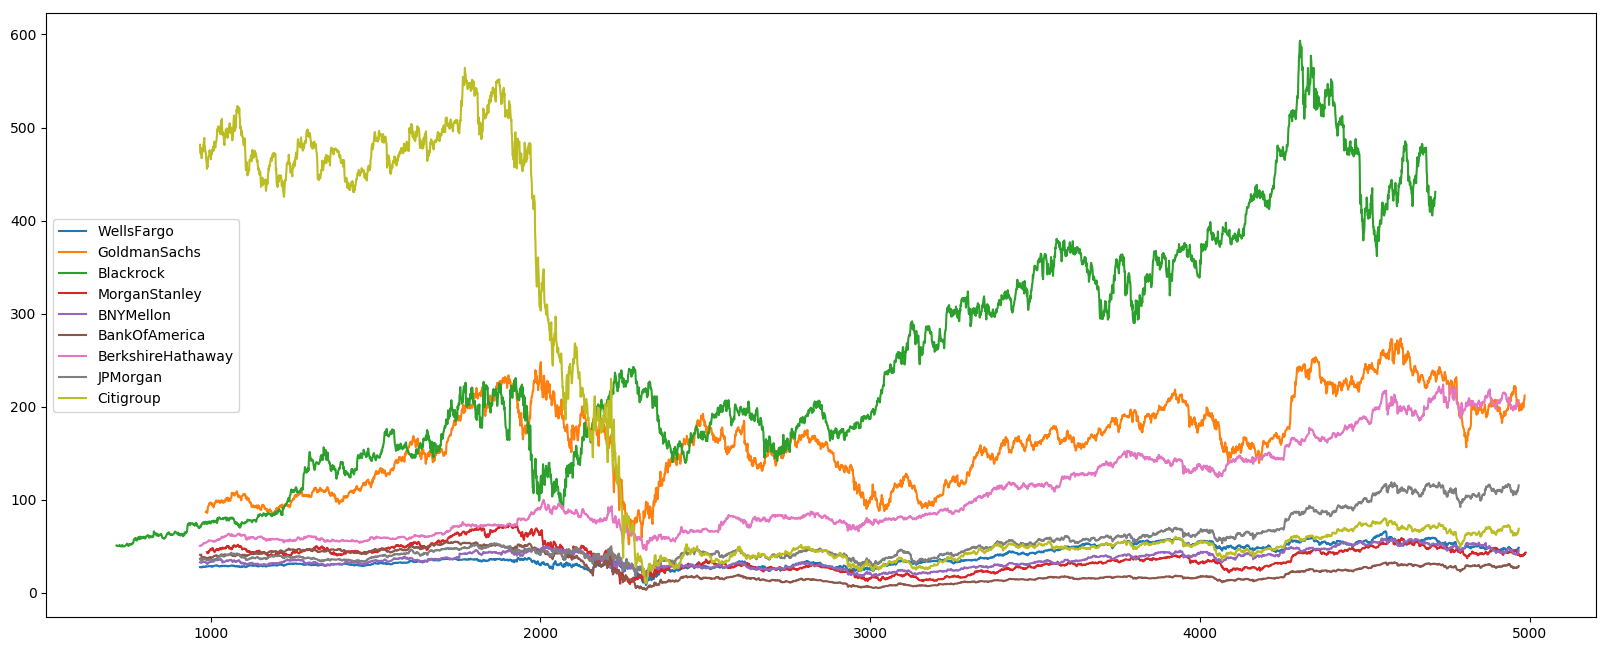

In [10]:
for df, t in zip(dataset, ticker):
    plt.plot(df['Close'][-4000:-1], label = t)
    plt.legend()
    #plt.plot(df['Close_FFT_50'][-500:-1])

In [11]:
class Plot:
    
    def __init__(self, data):
        self.data = data
        
    def autocorr(self, col, ticker):
        
        plot_acf(data[col], title = col + ' Autocorrelation Plot of ' + ticker)
        plt.show()
            
    def featureImportance(self, feature_importance, num_features, flag, ticker):
    
        f = dict()
        n = len(feature_importance)
        for i in range (n):
            f[X_test.columns[i]] = feature_importance[i]
        f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
        f = f[:num_features]
        feature_name = list()
        feature_values = list()
        for i, j in f:
            feature_name.append(i)
            feature_values.append(j)
        fig = plt.figure(figsize=(14,5))
        plt.xticks(rotation='vertical')
        plt.bar([i for i in range(len(f))], feature_values, tick_label=feature_name)
        if flag == 1:
            plt.title('Feature importance for EPS Prediction of ' + ticker + ' (Excluding Analyst estimate features)')
        else:
            plt.title('Feature importance for EPS Prediction of ' + ticker + ' (Including Analyst estimate features)')
        plt.show()
    
    def lossStatsAndCurve(self, X_test, Y_test, regressor, ticker):
        
        
        rmse = np.sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))
        print("Root Mean Squared Error: %f" % (rmse))
        #print ("Regression Prediction Score: " + str(round(regressor.score(X_test,Y_test) * 100, 2)) + "%")
        eval_result = regressor.evals_result()
        training_rounds = range(len(eval_result['validation_0']['rmse']))
        plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
        plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title('Training Vs Validation Error of ' + ticker)
        plt.legend()
        plt.show()

## Using XGBoost Method for EPS prediction (Regression Problem) and Feature Importance

In [12]:
class Model:
    def __init__(self, X_train, Y_train, X_test, Y_test):
        
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
    
    def trainModel(self, epoch = 1200, verbose_flag = False, learning_rate = 0.01):
        
        regressor = xgb.XGBRegressor(colsample_bytree = 0.4, learning_rate = learning_rate, base_score=0.65, max_depth = 4, alpha = 10, n_estimators = epoch)
        xgbModel=regressor.fit(X_train, Y_train,eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = verbose_flag)
        return (xgbModel, regressor)


In [13]:
def getData(data_temp, inc_analyst):
    
    data = data_temp.copy()
    Y = data['EPS (diluted)']
    
    del data['EPS (recurring)']
    del data['EPS (diluted)']
    
    if inc_analyst == False:
        #del data['Growth (YoY%)_Analyst']
        del data['EPS_Analyst']
    X = data
    
    train_samples = int(X.shape[0] * 0.6)
    train_start = int(X.shape[0]*0) 
    
    X_train = X.iloc[train_start:train_samples]
    X_test = X.iloc[train_samples: train_samples + 150]

    Y_train = Y.iloc[train_start:train_samples]
    Y_test = Y.iloc[train_samples: train_samples + 150]
    
    
    return (X_train, Y_train), (X_test, Y_test)

## Including Analyst Data

Training for: WellsFargo
[19:51:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.492376


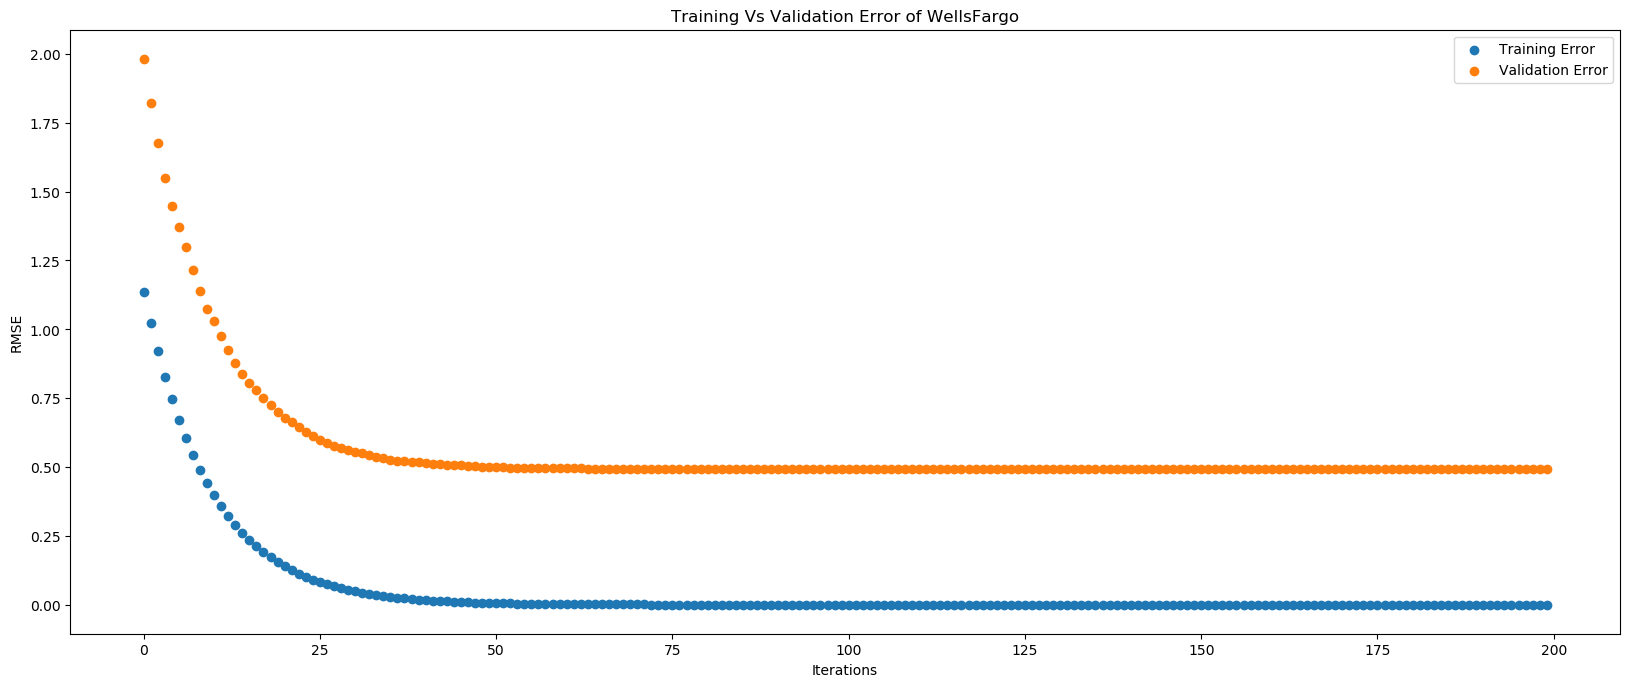

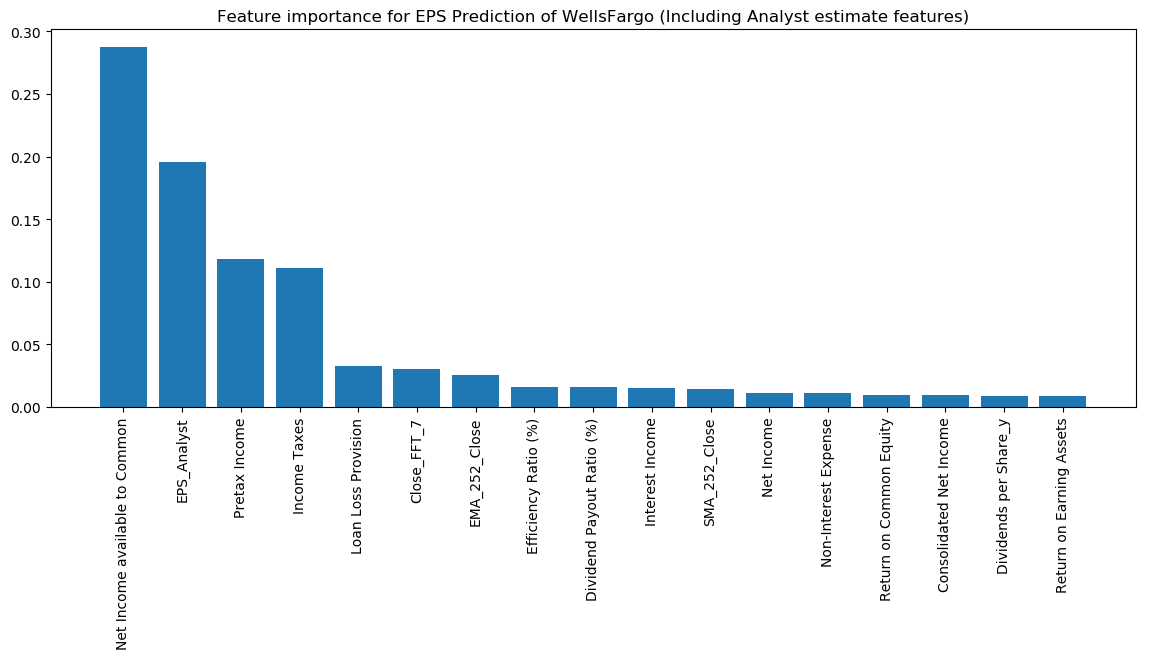

Training for: GoldmanSachs
[19:51:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 1.547055


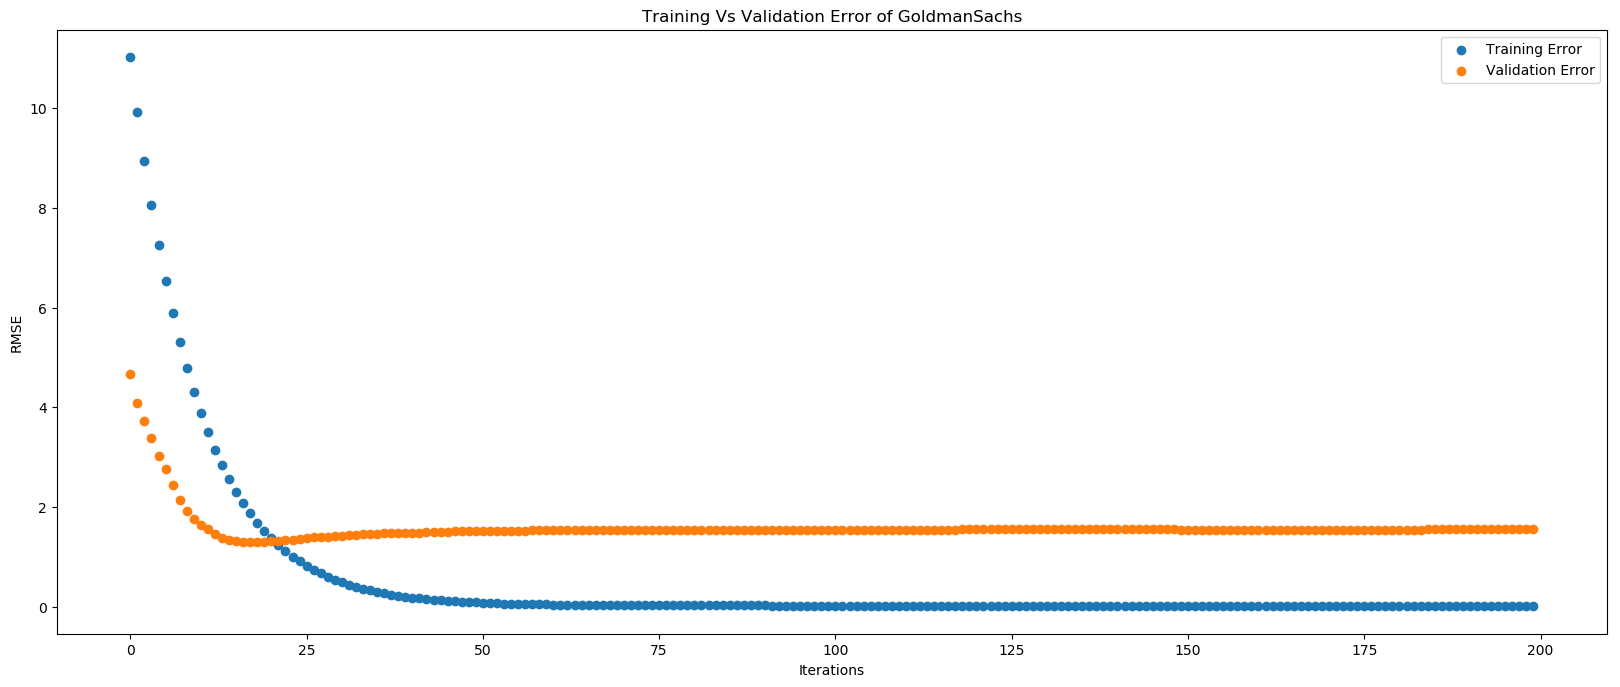

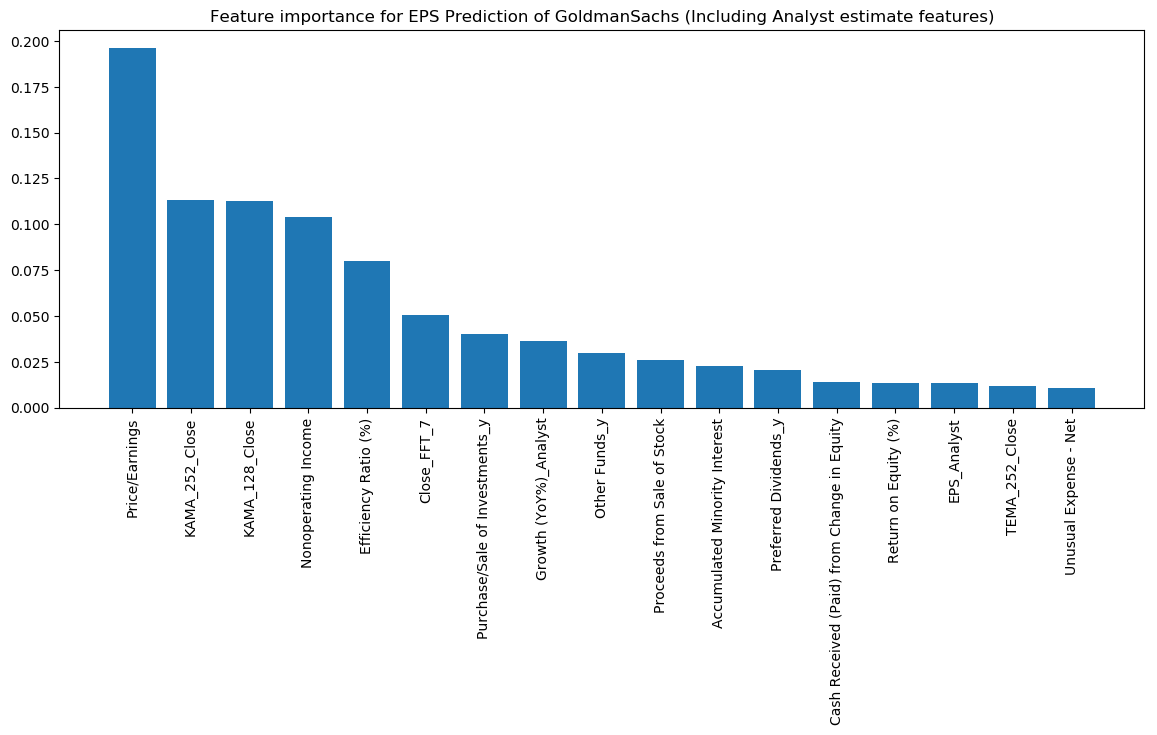

Training for: Blackrock
[19:51:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.791905


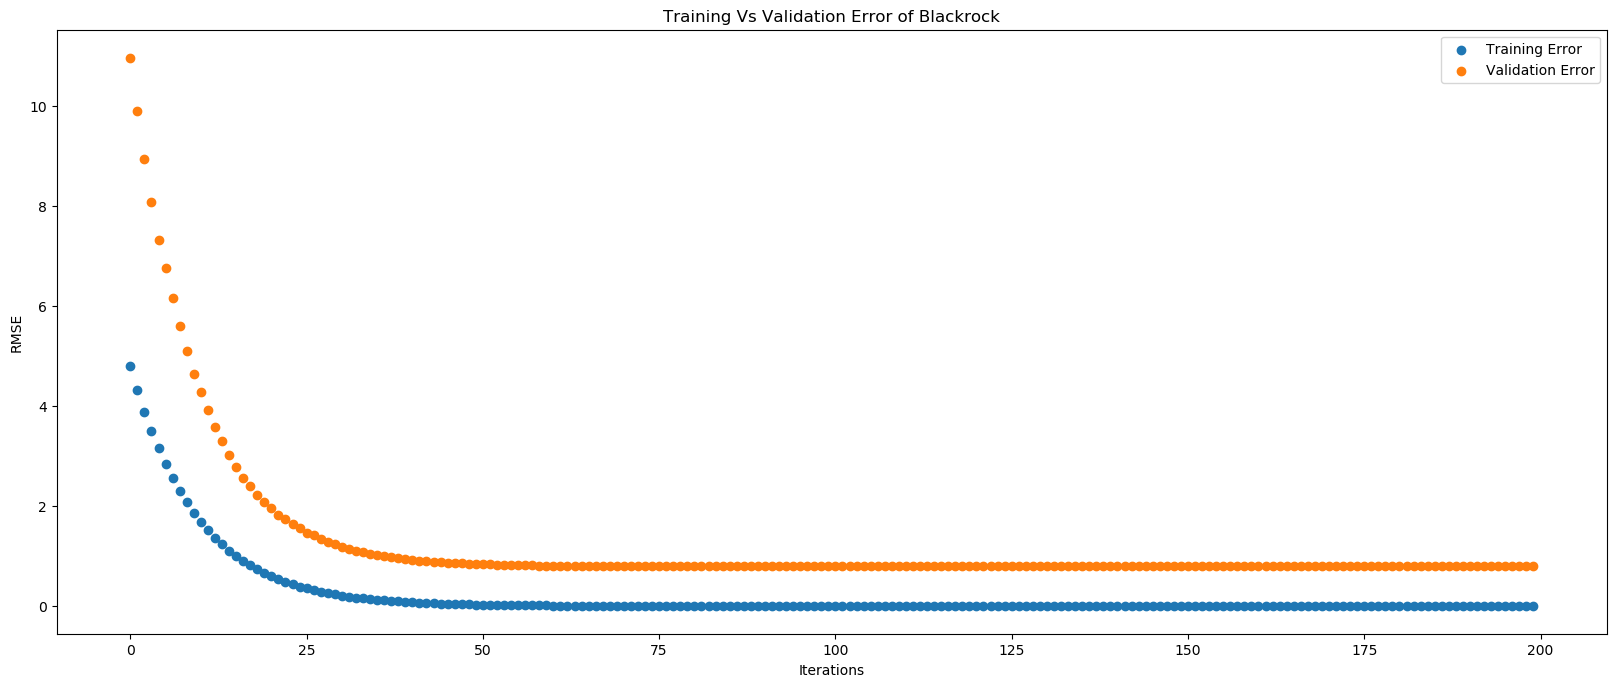

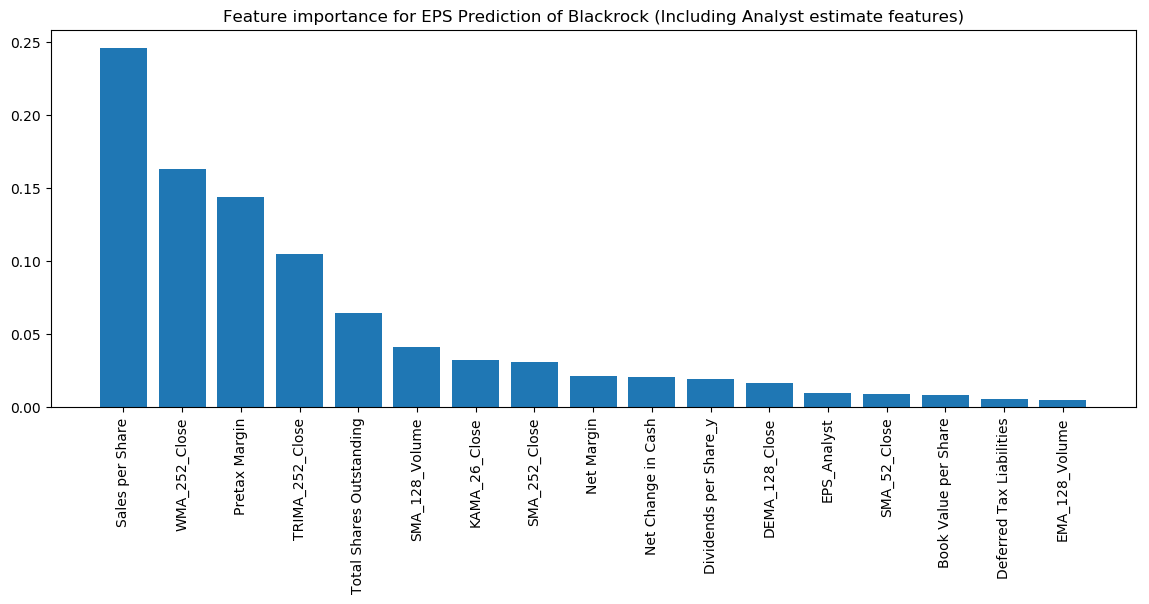

Training for: MorganStanley
[19:51:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.179163


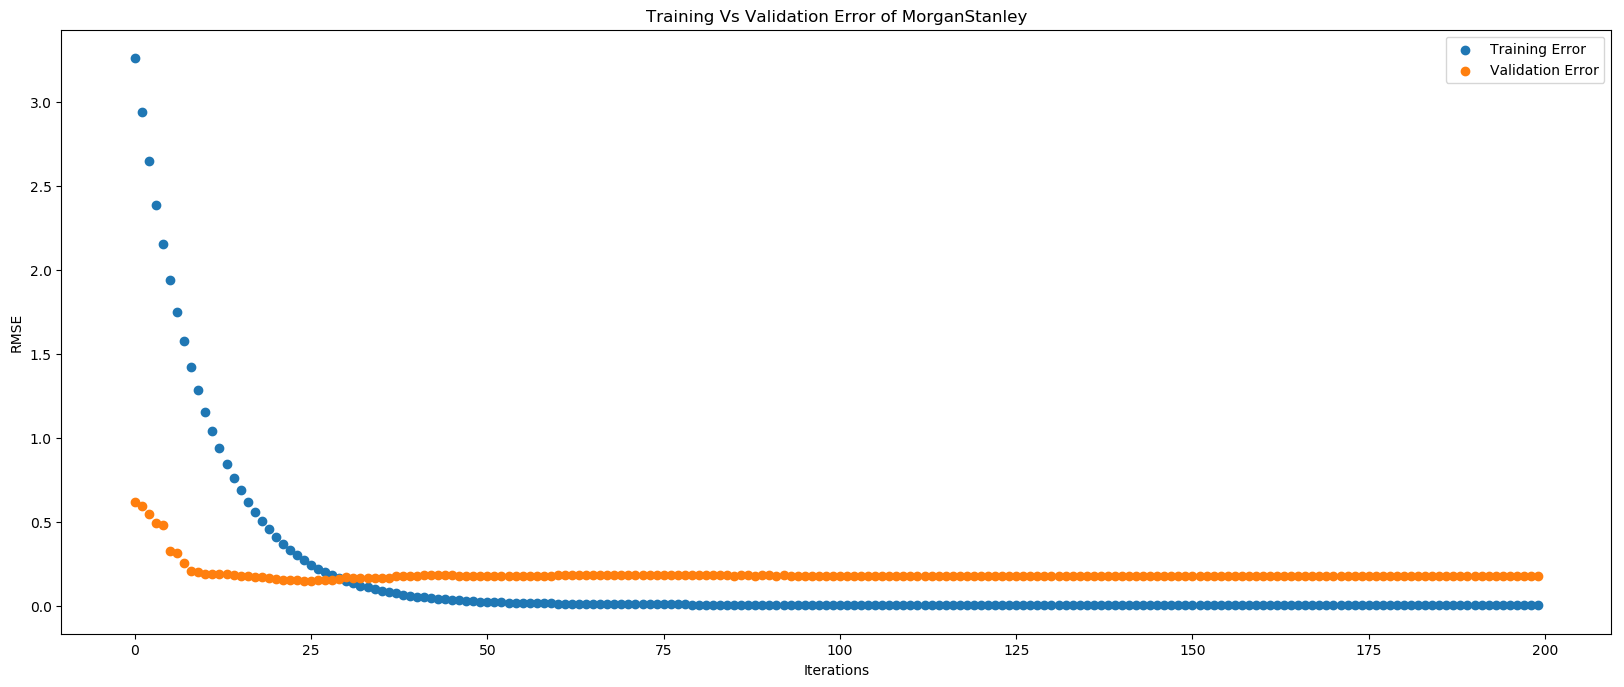

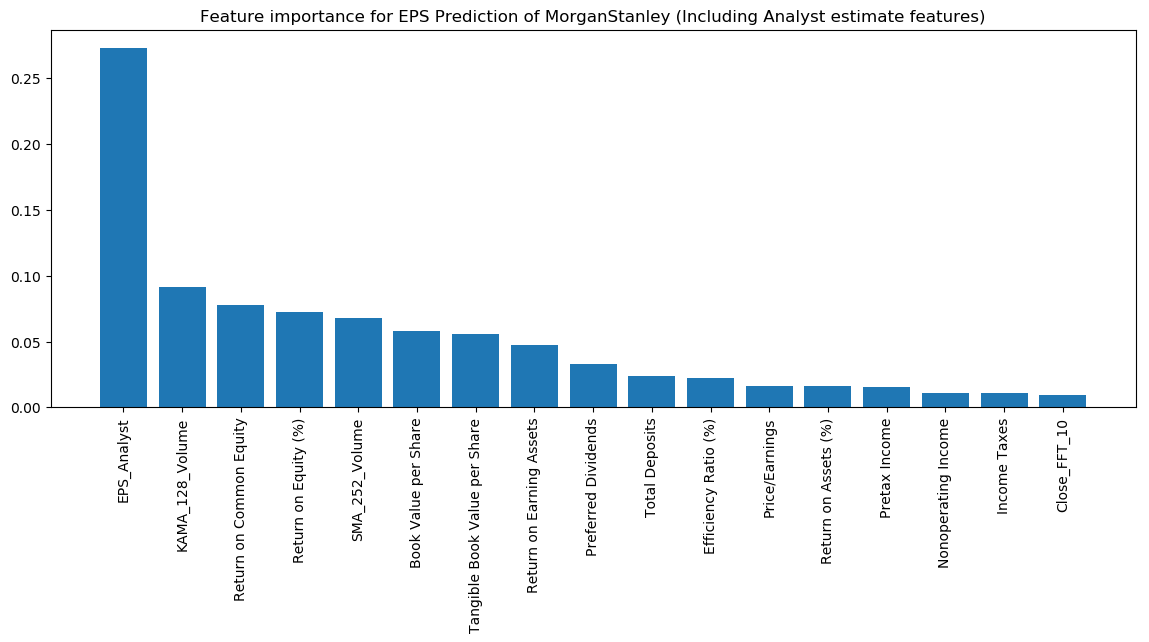

Training for: BNYMellon
[19:52:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.134833


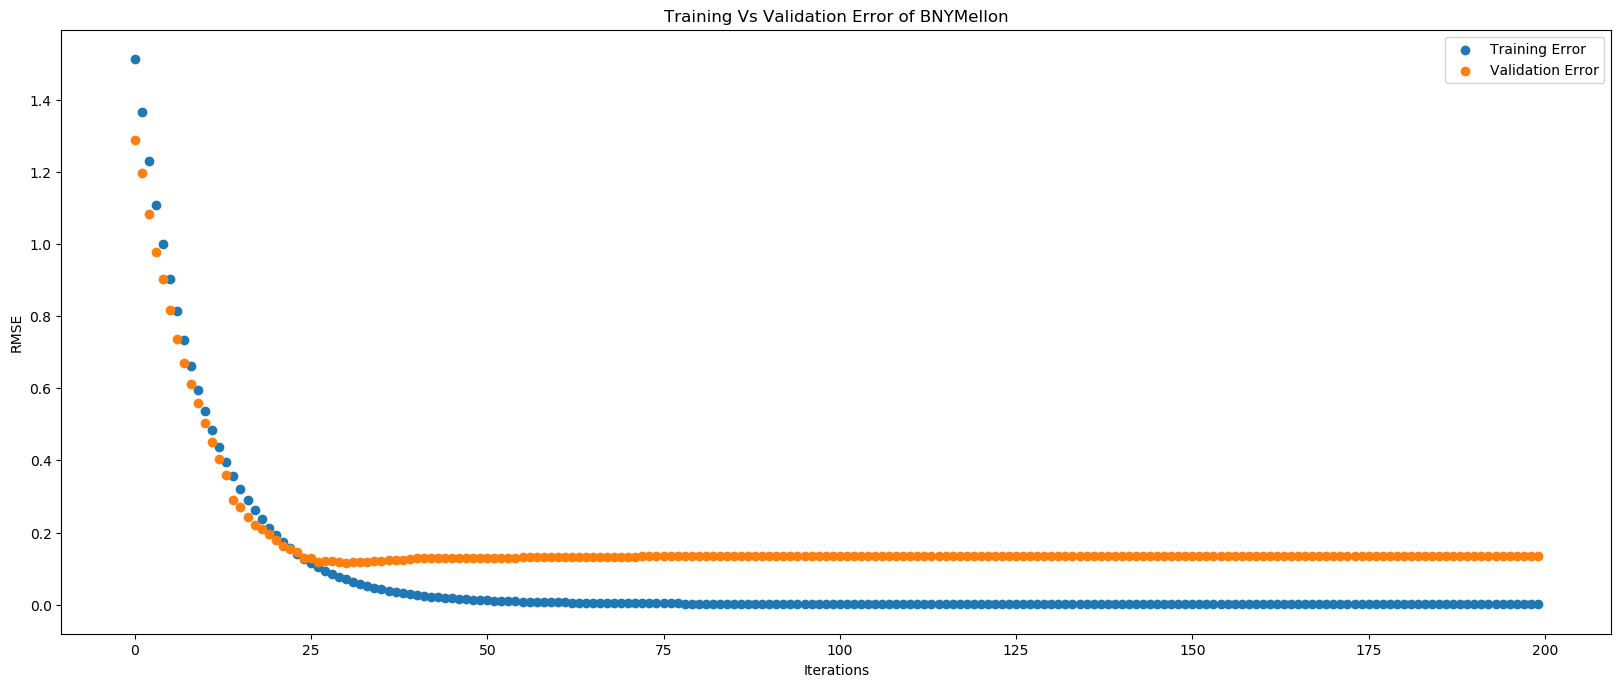

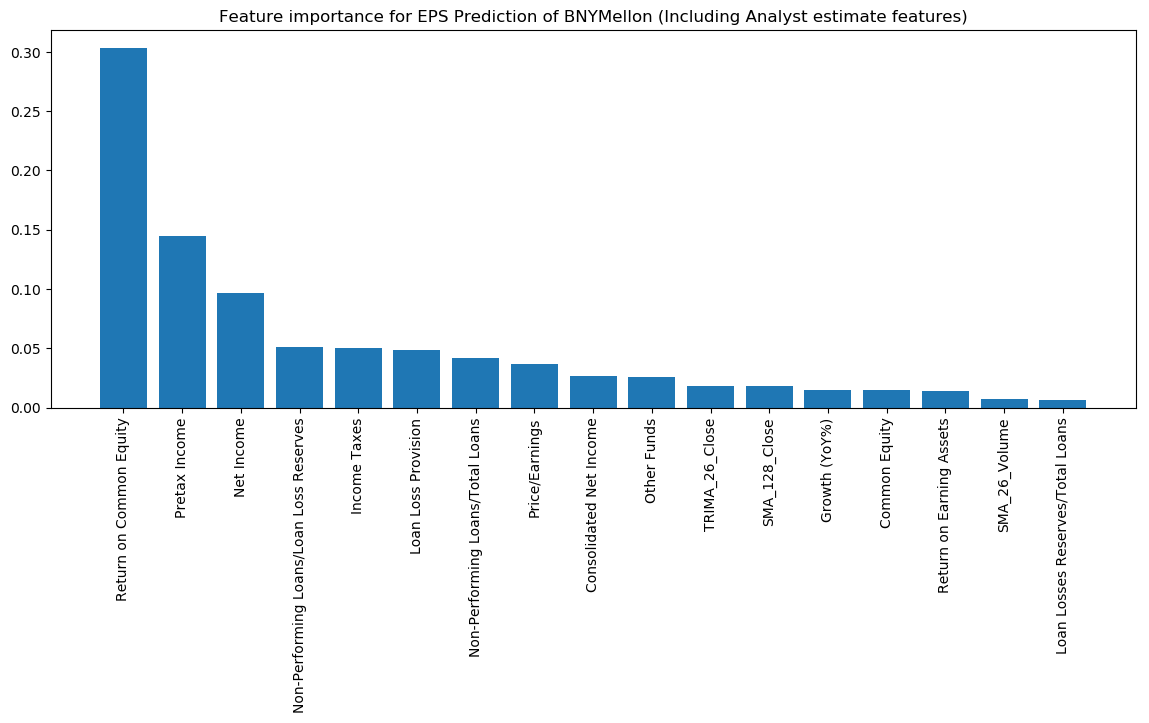

Training for: BankOfAmerica
[19:52:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.251912


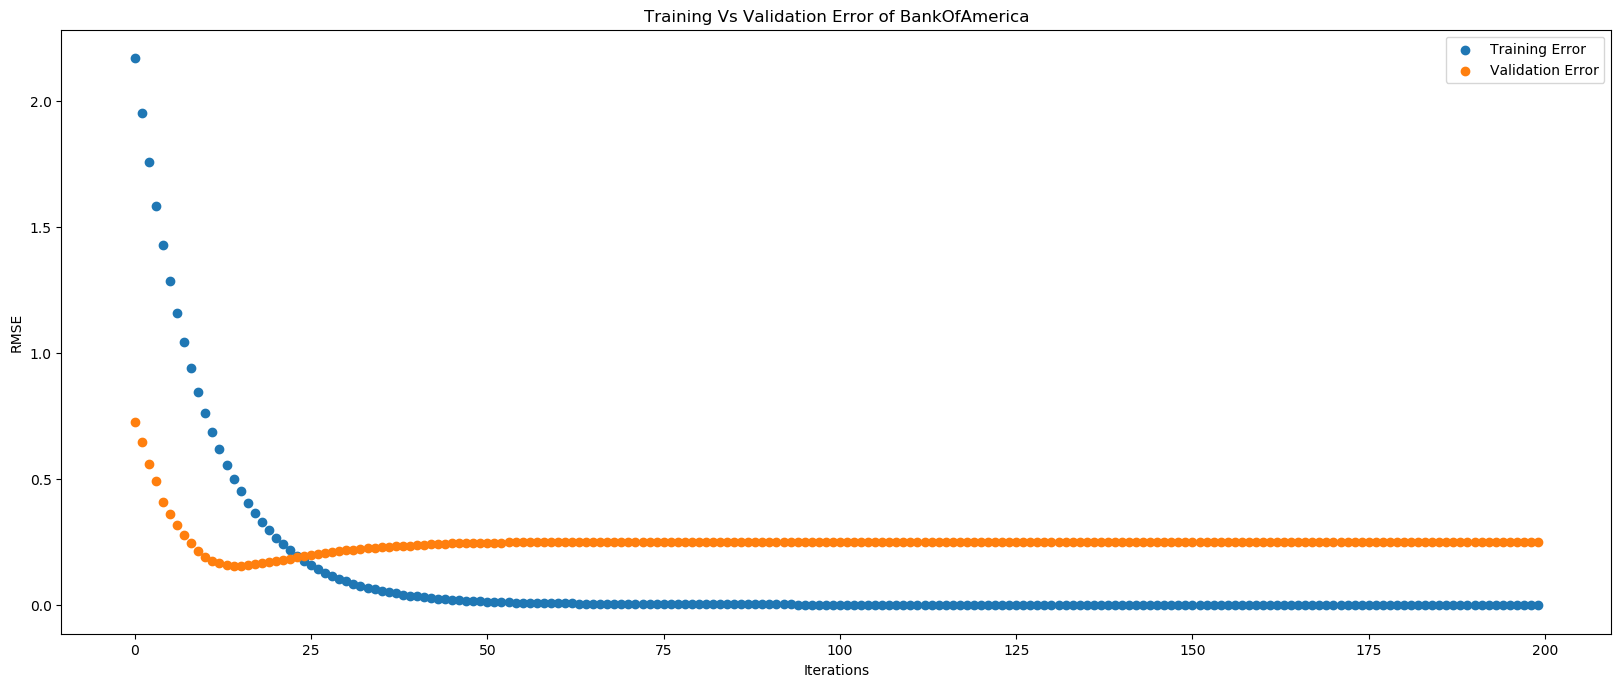

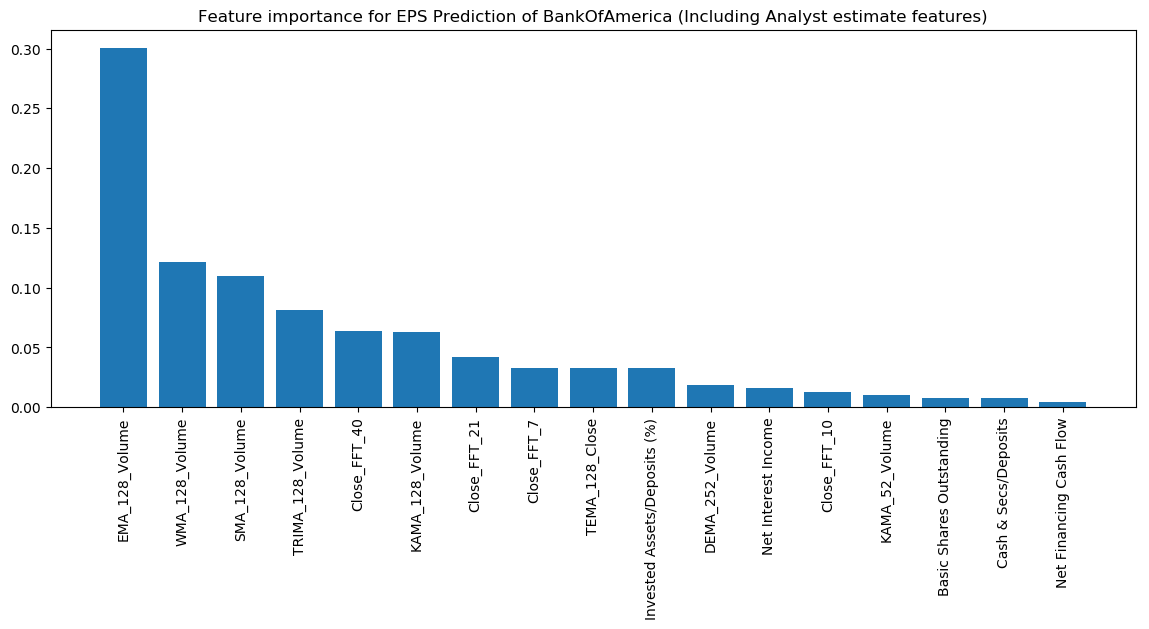

Training for: BerkshireHathaway
[19:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.456606


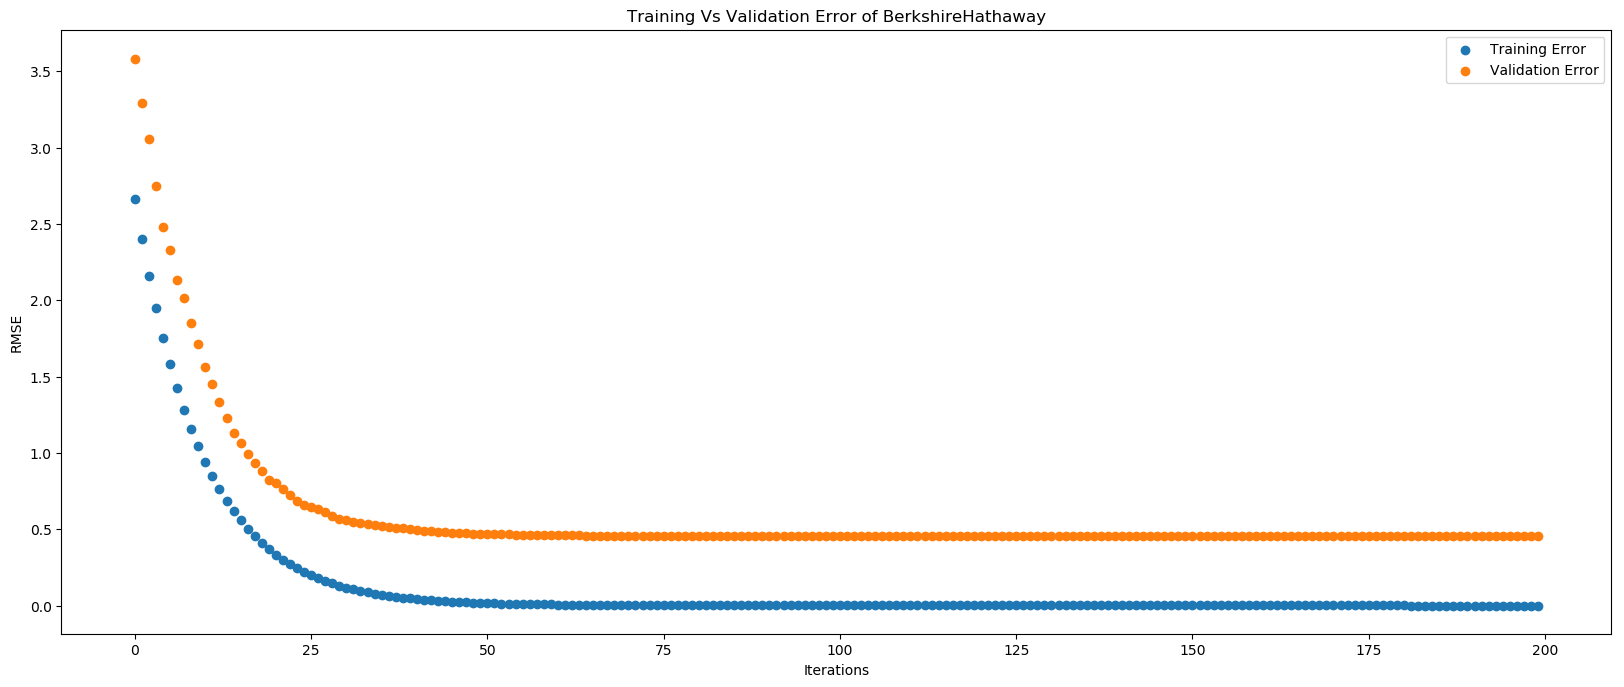

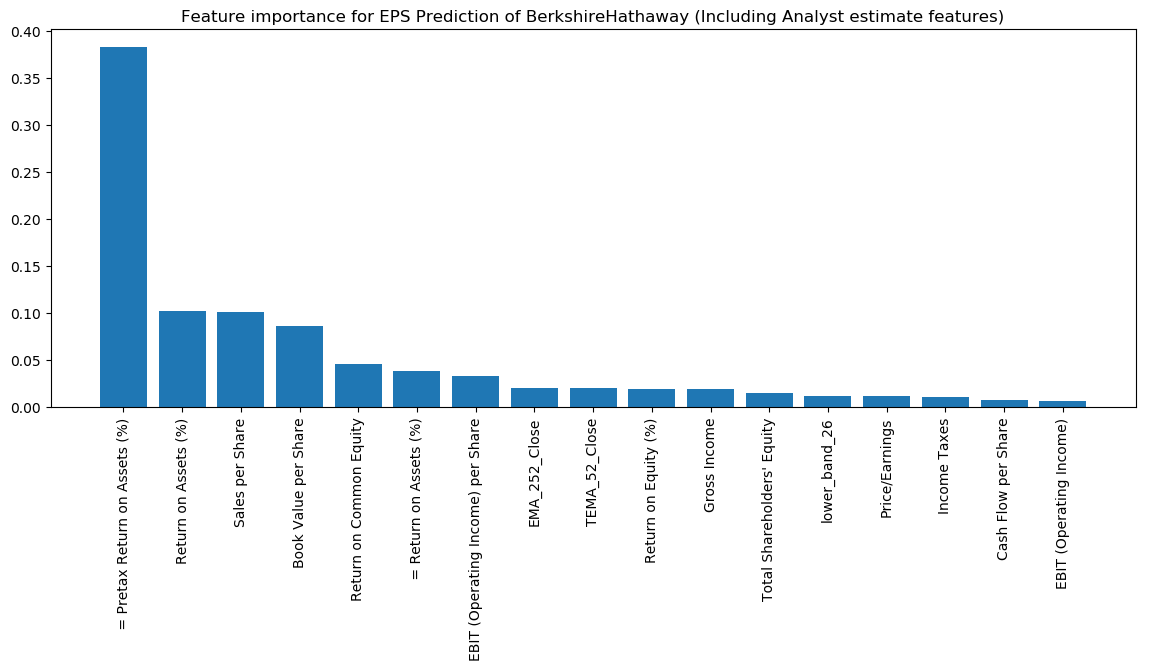

Training for: JPMorgan
[19:52:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 0.459416


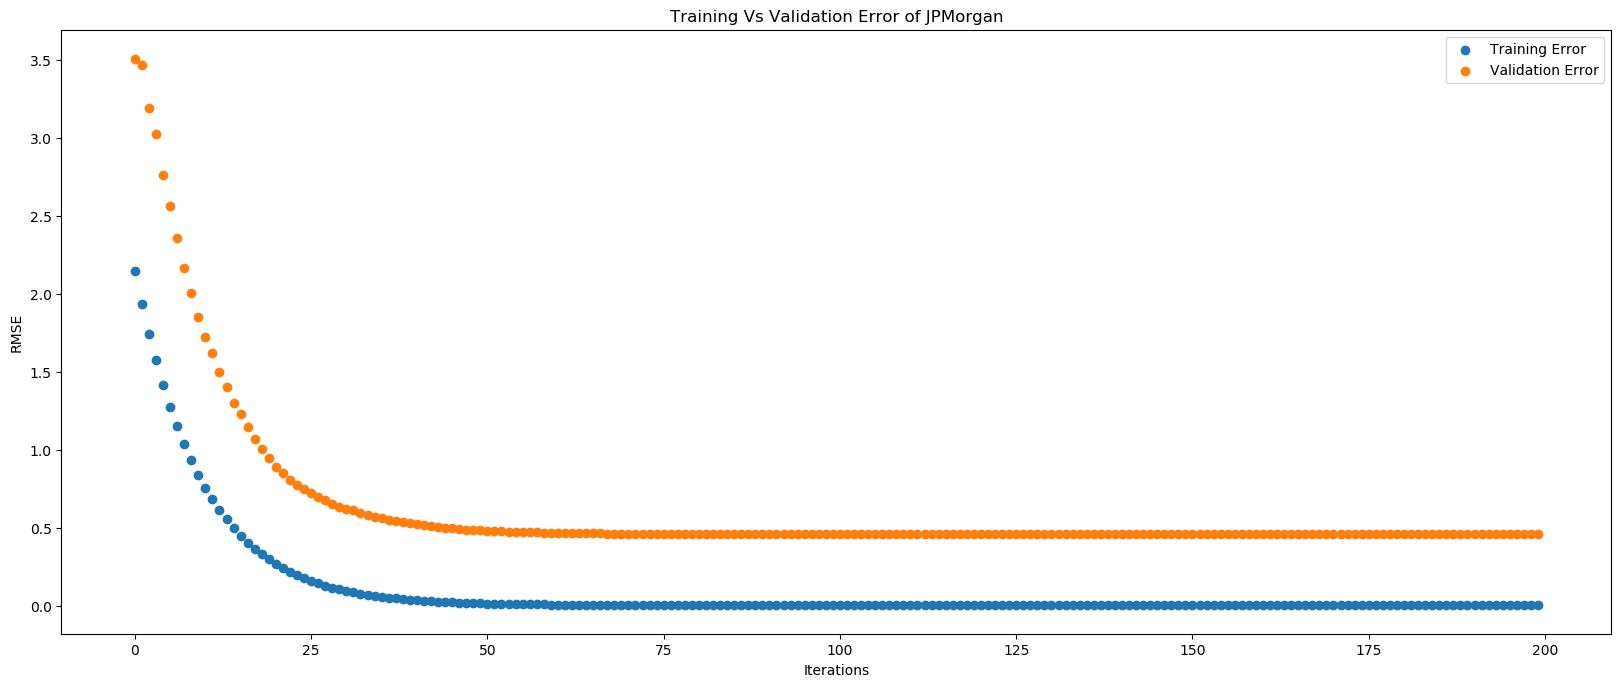

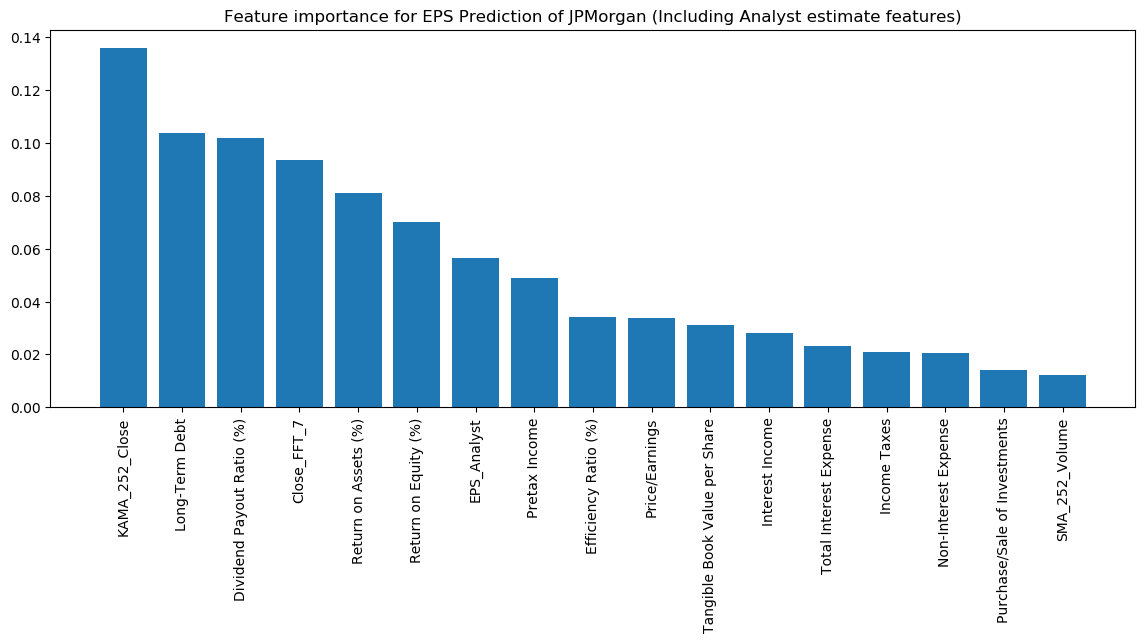

Training for: Citigroup
[19:52:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 2.339879


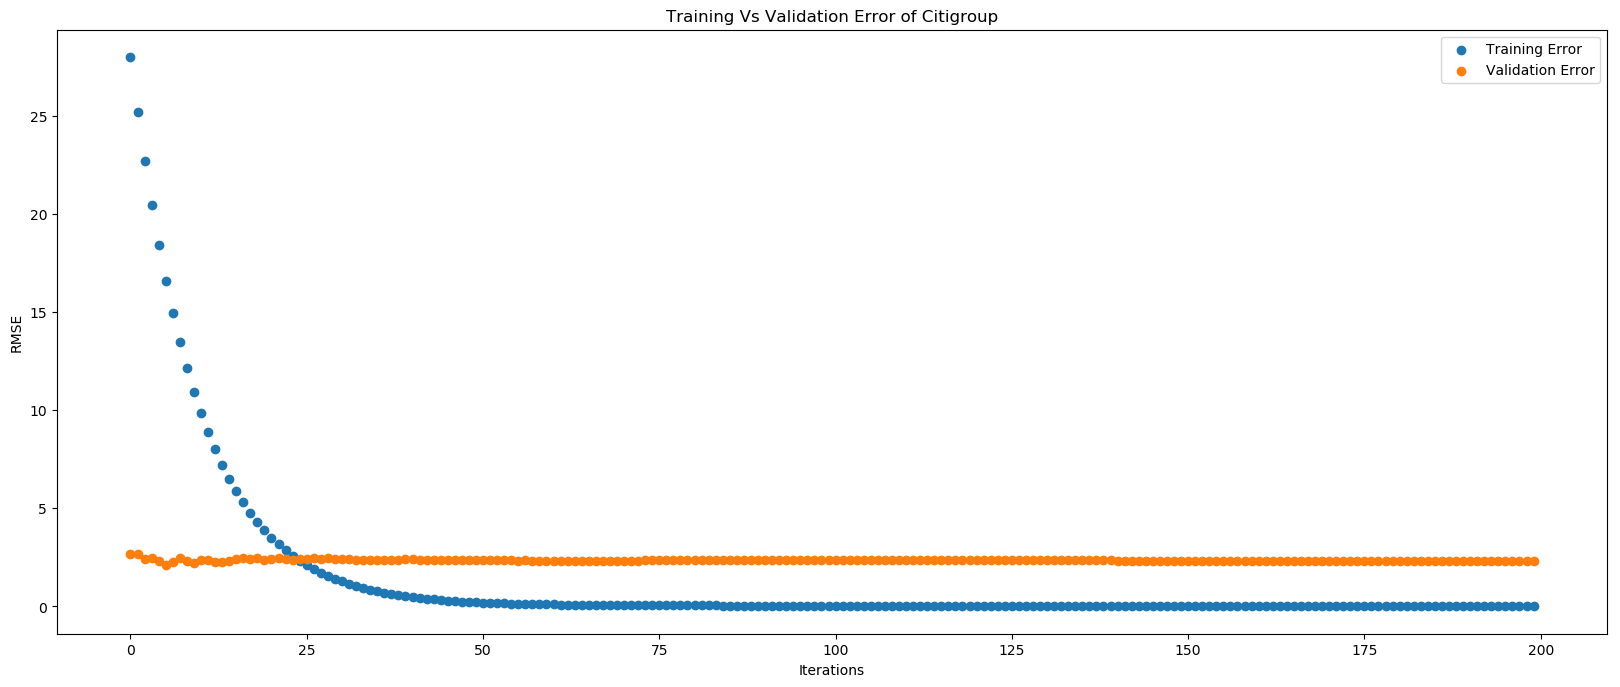

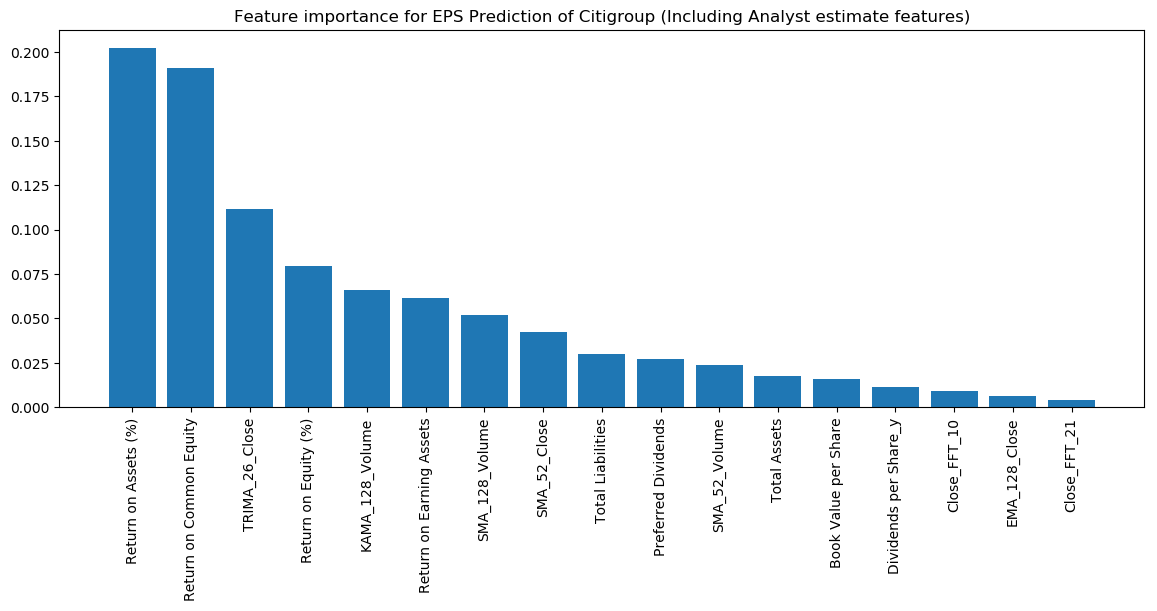

In [15]:

xgbModel = list()
regressor = list()
test_set = list()
for df, t in zip(dataset, ticker):
    
    print ("Training for: " + t)
    (X_train, Y_train), (X_test, Y_test) = getData(df, inc_analyst = True)
    test_set.append(X_test)
    m1 = Model(X_train, Y_train ,X_test, Y_test)
    xgbModel_, regressor_ = m1.trainModel(verbose_flag=False, epoch = 200, learning_rate=0.1)
    xgbModel.append(xgbModel_)
    regressor.append(regressor_)
    
    plot = Plot(data)
    plot.lossStatsAndCurve(X_test, Y_test, regressor_, t)
    feature_importance = xgbModel_.feature_importances_.tolist()
    plot.featureImportance(feature_importance, 17, 0, t)


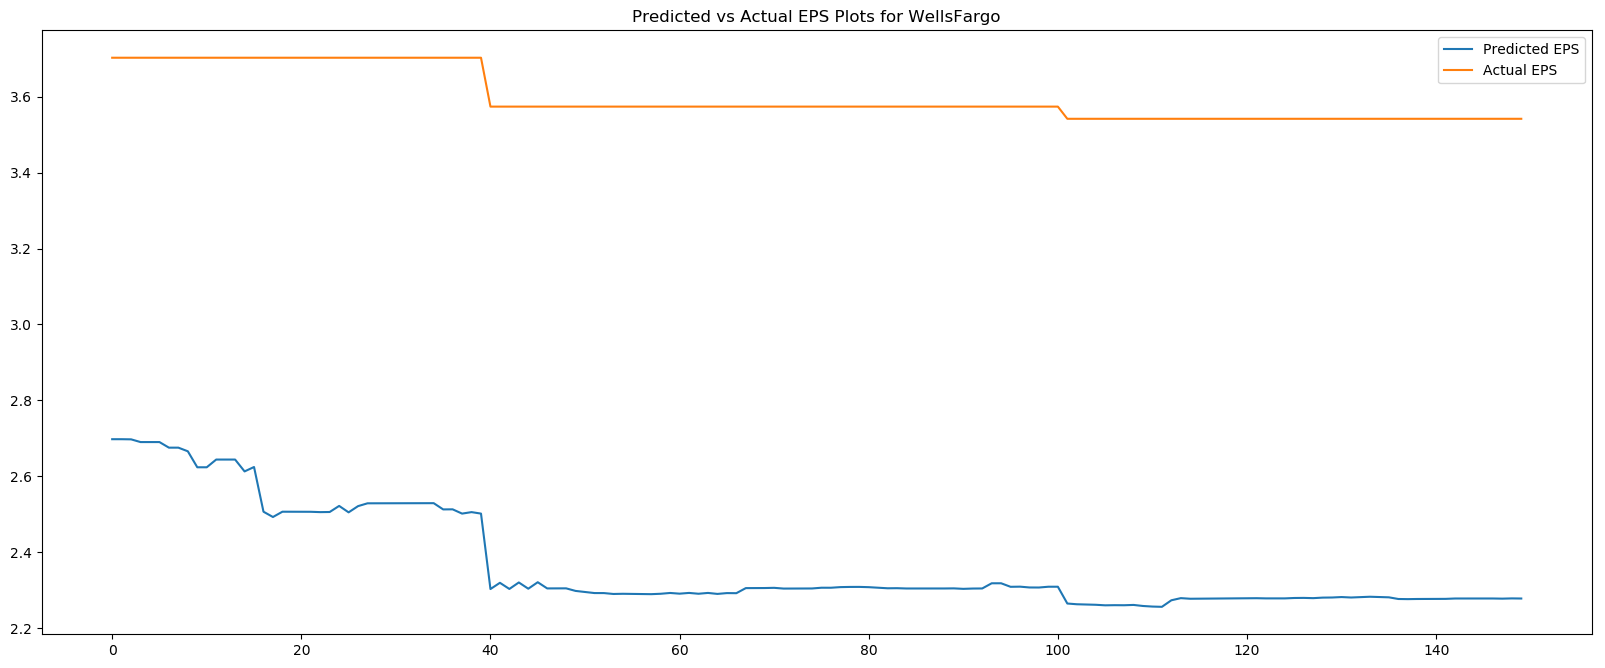

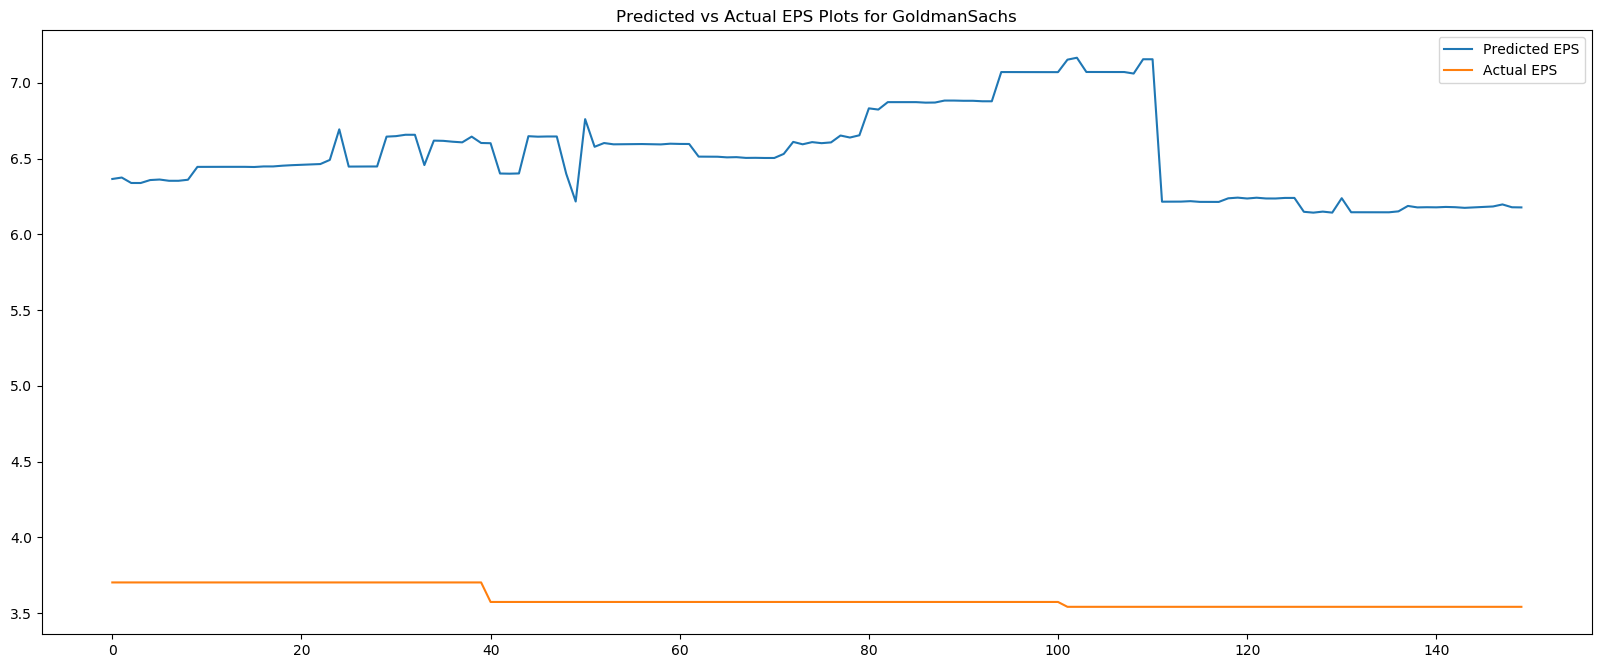

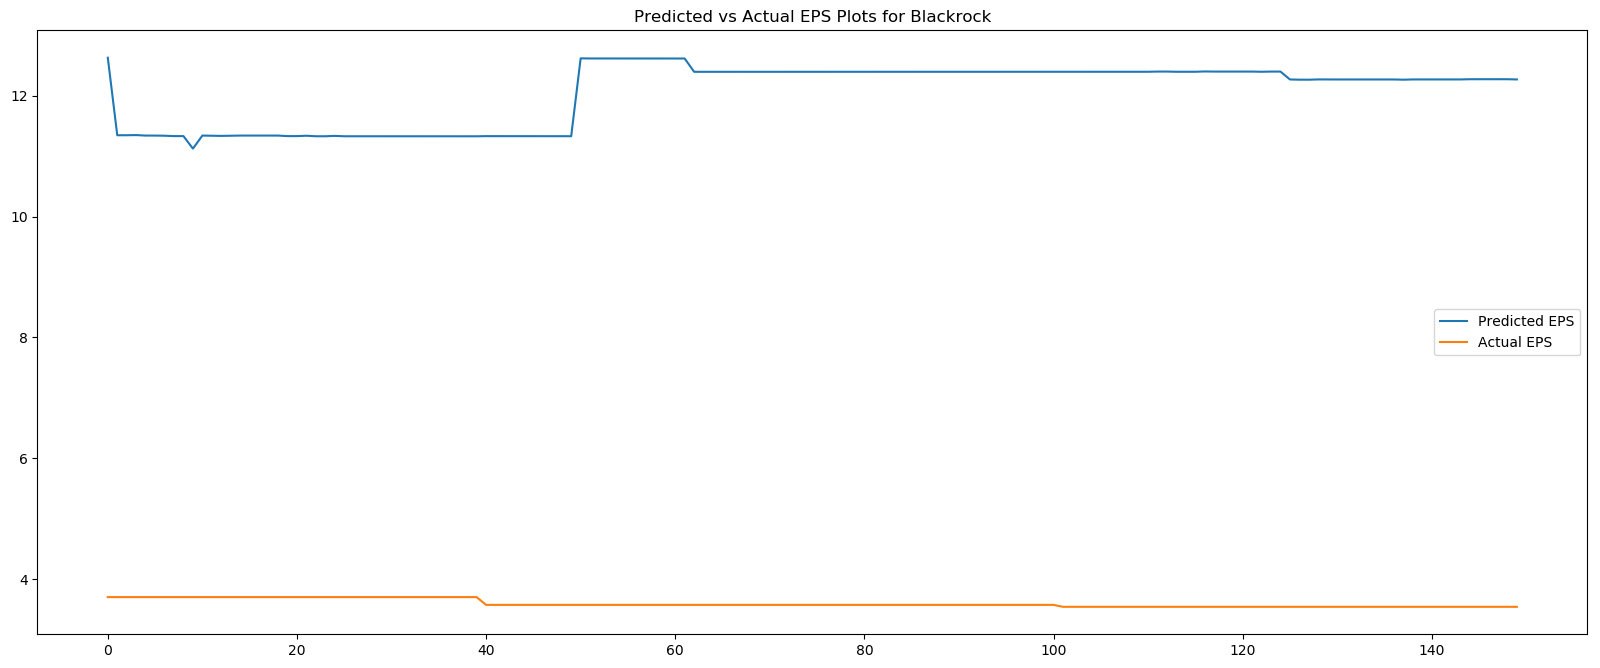

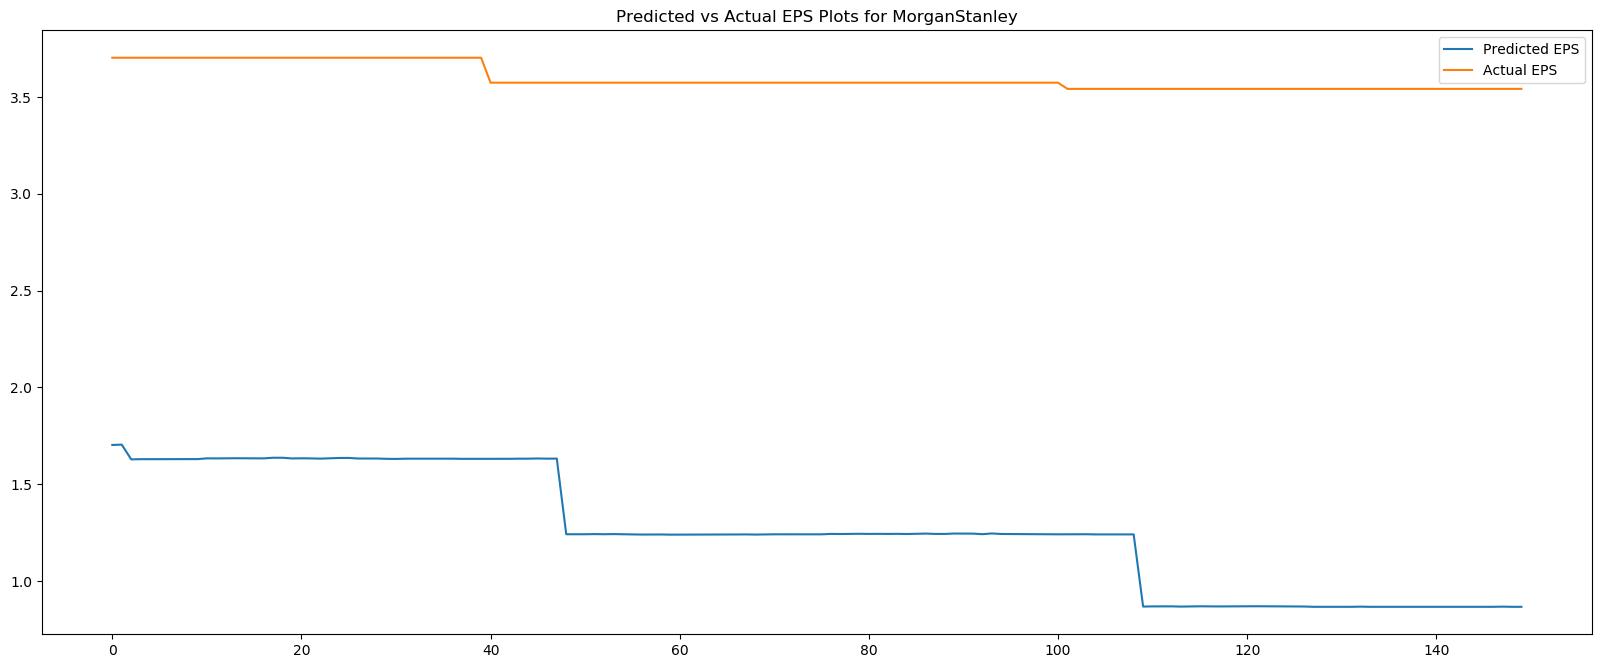

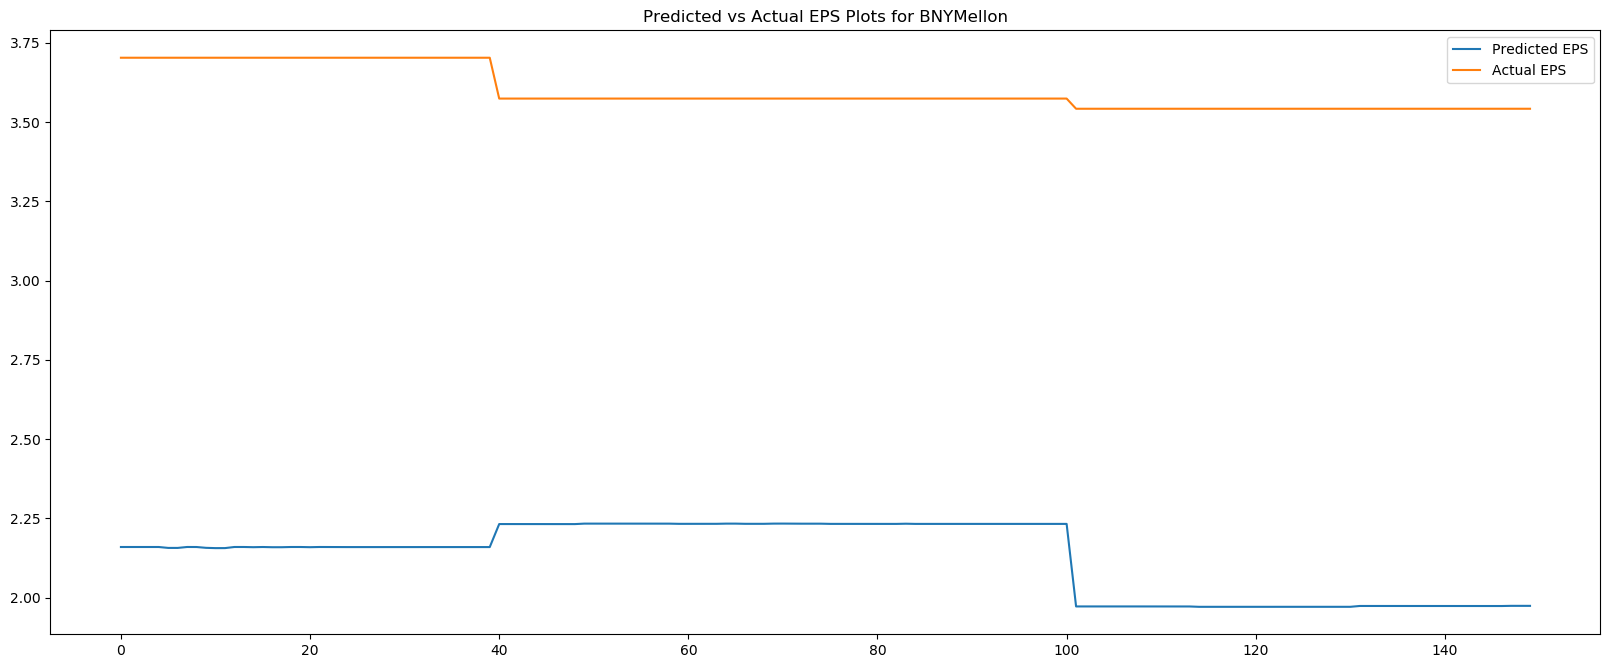

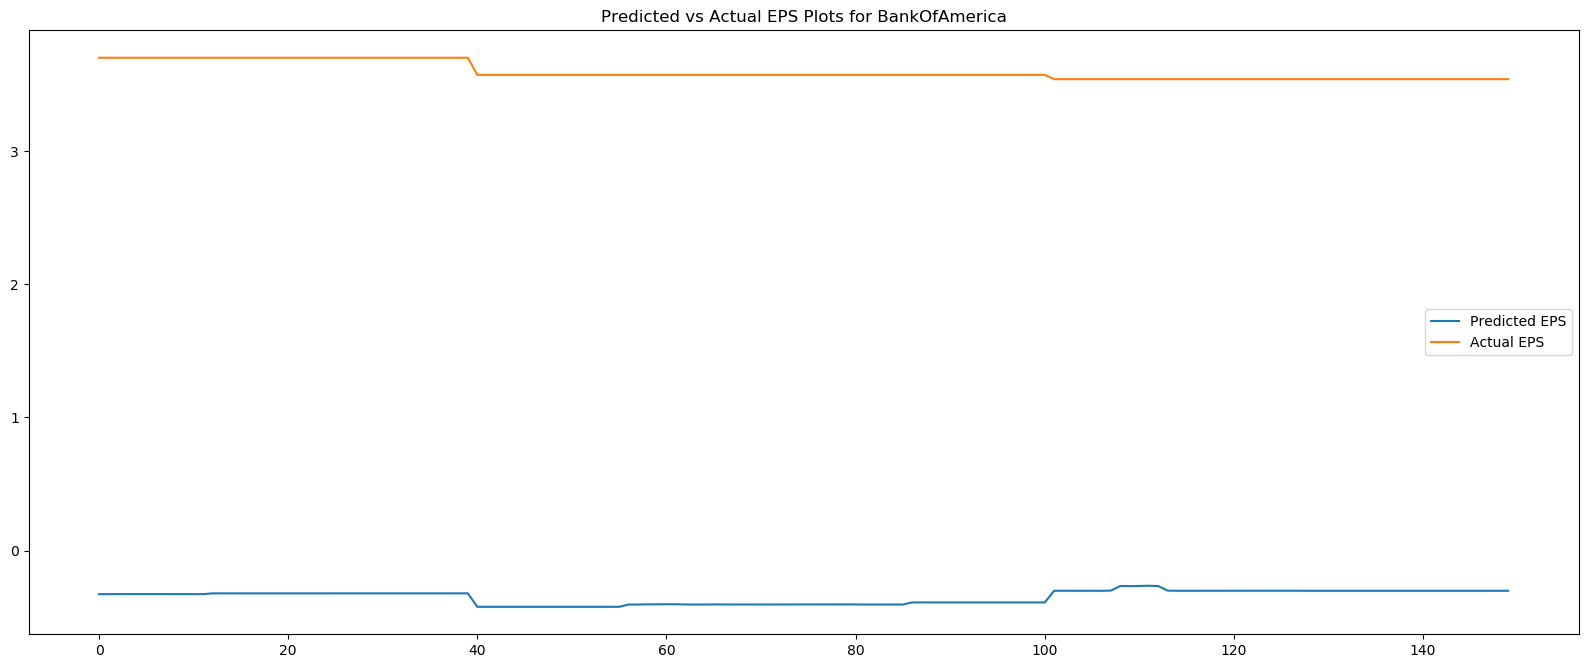

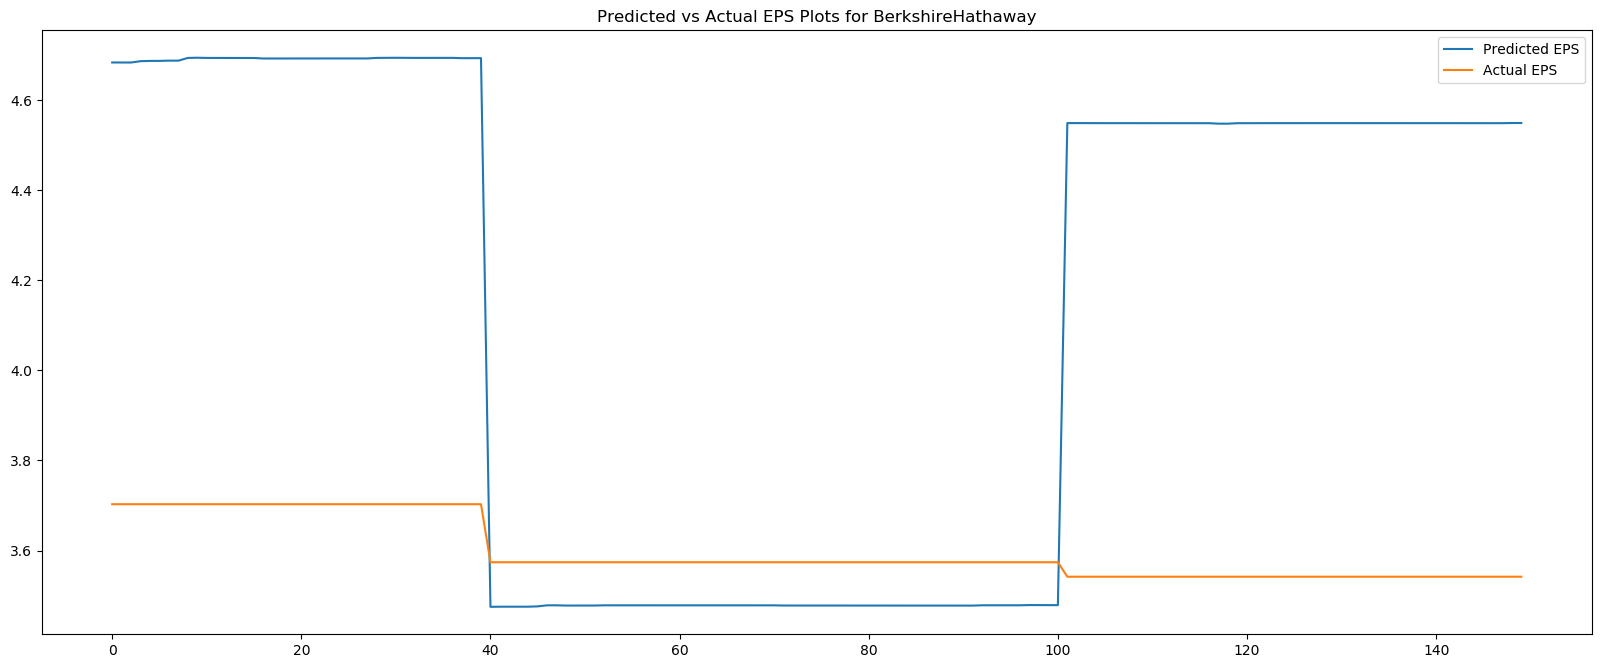

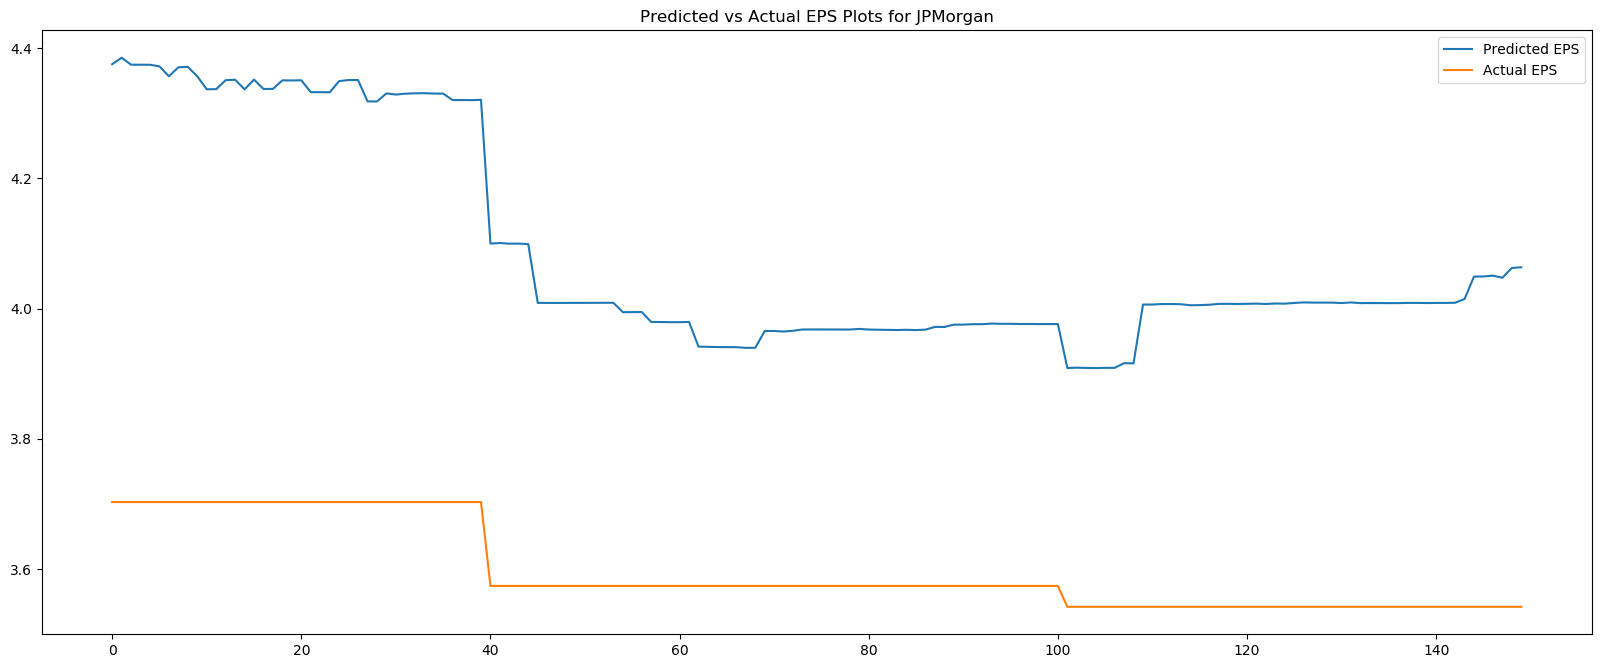

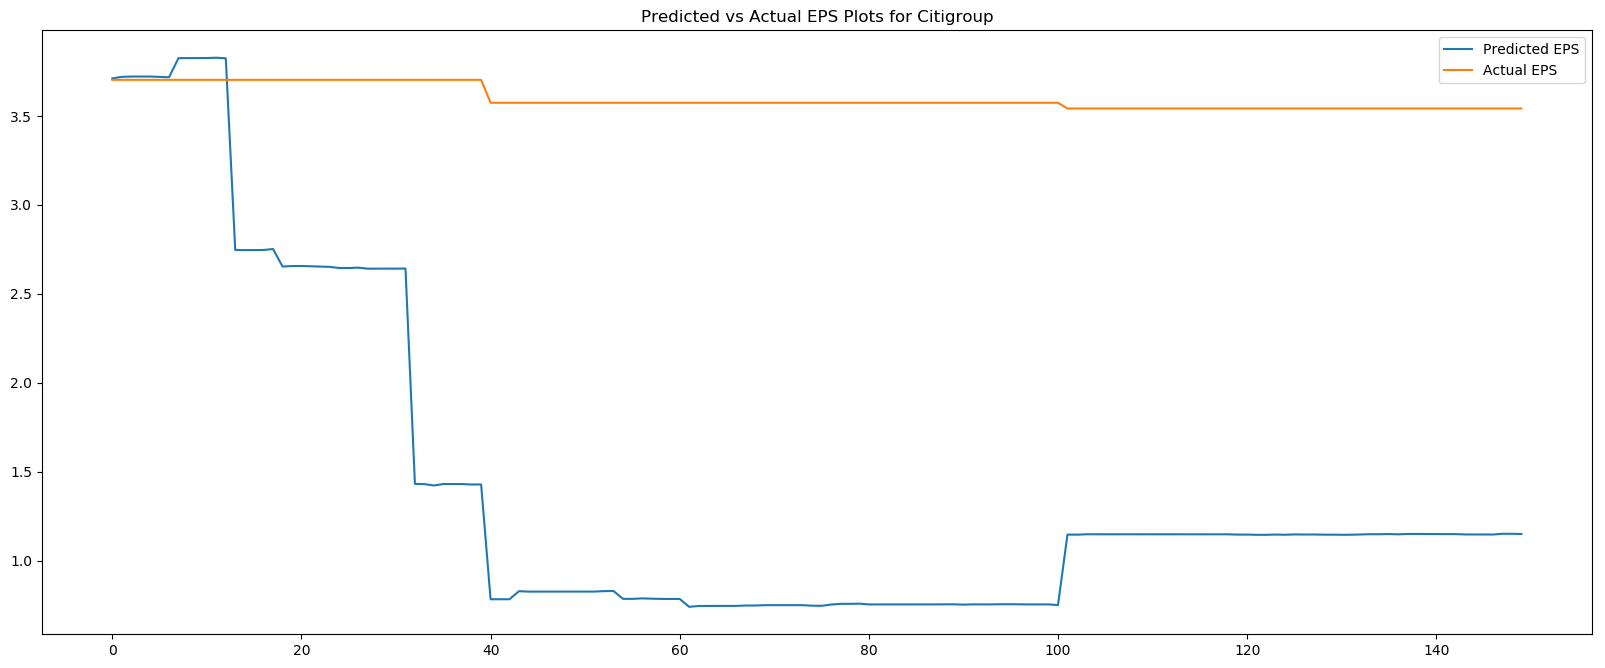

In [16]:
for reg, X_test, t in zip(regressor, test_set, ticker):
    
    y_pred = reg.predict(X_test)
    plt.title("Predicted vs Actual EPS Plots for " + t)
    plt.plot(range(len(y_pred)) , y_pred, label = "Predicted EPS")  
    plt.plot(range(len(Y_test)), Y_test, label = "Actual EPS") 
    plt.legend()
    plt.show()